# Arquivo de entrada

Como discutido no enunciado do projeto o arquivo de entrada tem um formato simples. Ele se chama tabela.txt e será composto de:

1. Uma linha inicial com o número de pontos, que vou chamar de n.
2. n+1 linhas contendo pares x_i f(x_i) para i = 0, ..., n + 1.

Abaixo você encontro um programa simples em Julia que gera exemplos do arquivo de entrada. Para modificar o exemplo você pode modificar a função que é amostrada (função f), o número de pontos (n), o ponto inicial (x_0) e o ponto final (x_n). Depois é só rodar o programa digitanto shift+enter. O arquivo tabela.txt é então gerado no diretório onde está esse notebook.

In [8]:
# Modifique as linhas abaixo para modificar o exemplo gerado. É interessante 
# você gerar muitos exemplos de teste para o seu código e não testar apenas
# no exemplo definido abaixo.
f(x) = log(x)
x_0 = 1
x_n = 500
n = 200

# Não modifique a partir daqui a não ser que você saiba o que está fazendo.

# Calcula os pontos inermediários e a função nos pontos.
x = linspace(x_0, x_n, n + 1)
fx = f(x)

# Gera arquivo de saida
saida = open("tabela.txt", "w")
@printf saida "%i\n" (n + 1)

for i = 1:length(x)
    @printf saida "%.16e %.16e\n"  x[i] fx[i]
end
close(saida)

# Desenhando a spline
Já o programa abaixo desenha a spline calculada por seu programa. Para isso é necessário que os parâmetros f, x_0 e x_n abaixo sejam os mesmos que o seu programa usou (que leu do arquivo de entrada).

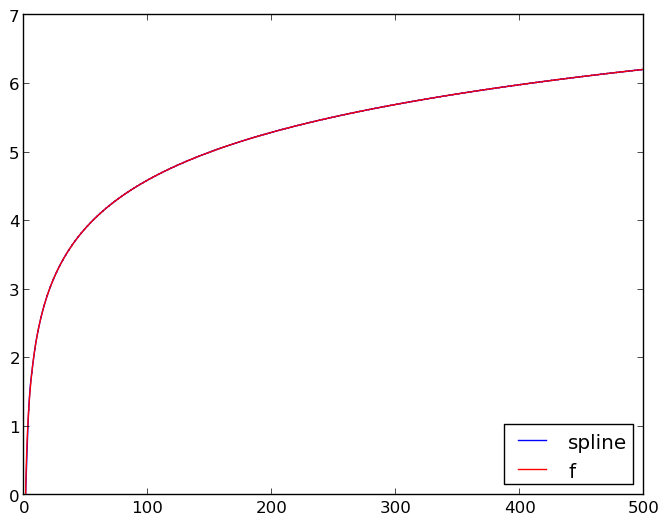

PyObject <matplotlib.legend.Legend object at 0x7f5ba5b78810>

In [10]:
using PyPlot

#TIVE QUE ADICIONAR PRO GRAFICO PODER APARECER (VITOR)
PyPlot.ion()

# Ajuste os parâmetros abaixo para os usados no seu programa
f(x) = log(x)
x_0 = 1
x_1 = 500

# Le o arquivo com os parâmetros da spline
dados_spline = open("splines.txt")

z = [0.0]
for line in eachline(dados_spline)
    campos = split(line)
    push!(z, float(campos[2]))
end

# Apresenta o grafico
n = length(z)
x = linspace(x_0, x_1, n)
h = x[2] - x[1]

function spline(x, z1, z2, x1, x2)
    s = (1/h)*z1*(x2 - x).^3/6 + (1/h)*z2*(x - x1).^3/6 
    s += (1/h)*(f(x2) - f(x1) + h^2/6*(z1 - z2))*(x - x1)
    s += f(x1) - h^2/6*z1
    return s
end

for i = 1:n - 2
    intervalo = linspace(x[i], x[i + 1], 100)
    plot(intervalo, spline(intervalo, z[i], z[i+1], x[i], x[i+1]), color="b")
    plot(intervalo, f(intervalo), color = "r")
end
i = n - 1
intervalo = linspace(x[i], x[i + 1], 100)
plot(intervalo, spline(intervalo, z[i], z[i+1], x[i], x[i+1]), color="b", label="spline")
plot(intervalo, f(intervalo), color = "r", label="f")
legend(loc=4)
